<a href="https://colab.research.google.com/github/abhijeetkundu8/Eda_project/blob/main/22BDS0272.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#REG NO- 22BDS0272
#NAME-ABHIJEET KUNDU
#DATASET LINK- https://raw.githubusercontent.com/salemprakash/EDA/main/Data/employee_promotion.csv
#GITHUB-https://github.com/abhijeetkundu8/Eda_project/blob/main/22BDS0272.ipynb
!pip install pandas matplotlib seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


In [ ]:
# Loading CSV from URL
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/employee_promotion.csv"
df = pd.read_csv(url)

df.head()


employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings age  previous_year_rating  \
0            sourcing                1  35                   5.0   
1               other                1  30                   5.0   
2            sourcing                1  34                   3.0   
3               other                2  39                   1.0   
4               other                1  45                   3.0   

   length_of_service  awards_won  avg_training_score is_promoted  
0                  8         0.0                49.0           0  
1                  4         0.0                60.0           0  
2                  7         0.0                50.0           0  
3                 10         0.0                50.0           0  
4                  2         0.0                73.0           0

In [ ]:
# Dimensions
print("Dataset shape:", df.shape)

# Info about columns
df.info()

# Summary statistics for numeric columns
df.describe()

# Summary statistics for categorical columns
df.describe(include=['object'])


Dataset shape: (54808, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  object 
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54807 non-null  float64
 11  avg_training_score    52247 non-null  float64
 12  is_promoted           54808 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 5.4+ MB


department    region   education gender recruitment_channel  \
count               54808     54808       52399  54808               54808   
unique                  9        34           4      2                   4   
top     Sales & Marketing  region_2  Bachelor's      m               other   
freq                16840     12343       36668  38496               30445   

          age is_promoted  
count   54808       54808  
unique     42           3  
top        30           0  
freq     3665       50139

In [ ]:
# Missing values count
print("\nMissing Values Before Handling:")
print(df.isnull().sum())

# Filling missing values
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].median())

# Verify missing values again
print("\nMissing Values After Handling:")
print(df.isnull().sum())



Missing Values Before Handling:
employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 1
avg_training_score      2561
is_promoted                0
dtype: int64

Missing Values After Handling:
employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
awards_won                 1
avg_training_score      2561
is_promoted                0
dtype: int64


In [ ]:
# Removing duplicates
df = df.drop_duplicates()

# Converting categorical columns to 'category' type
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].astype('category')


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   employee_id           54808 non-null  int64   
 1   department            54808 non-null  category
 2   region                54808 non-null  category
 3   education             54808 non-null  category
 4   gender                54808 non-null  category
 5   recruitment_channel   54808 non-null  category
 6   no_of_trainings       54808 non-null  int64   
 7   age                   54808 non-null  category
 8   previous_year_rating  54808 non-null  float64 
 9   length_of_service     54808 non-null  int64   
 10  awards_won            54807 non-null  float64 
 11  avg_training_score    52247 non-null  float64 
 12  is_promoted           54808 non-null  category
dtypes: category(7), float64(3), int64(3)
memory usage: 2.9 MB


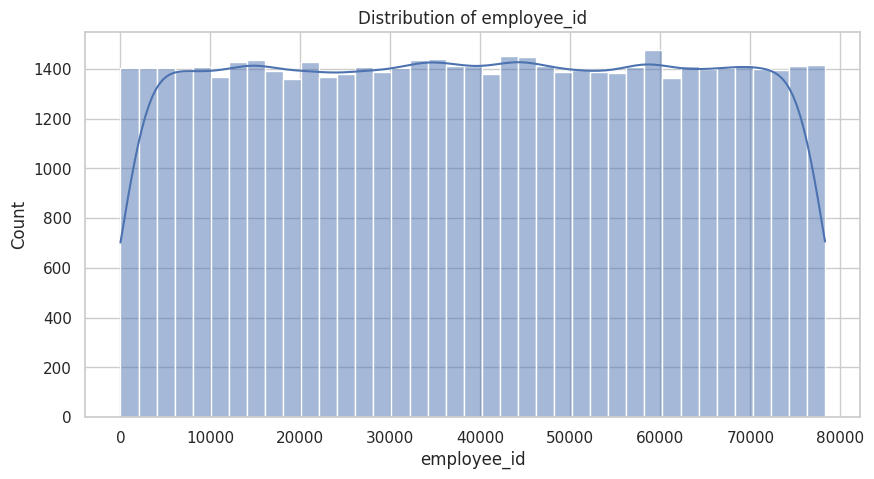

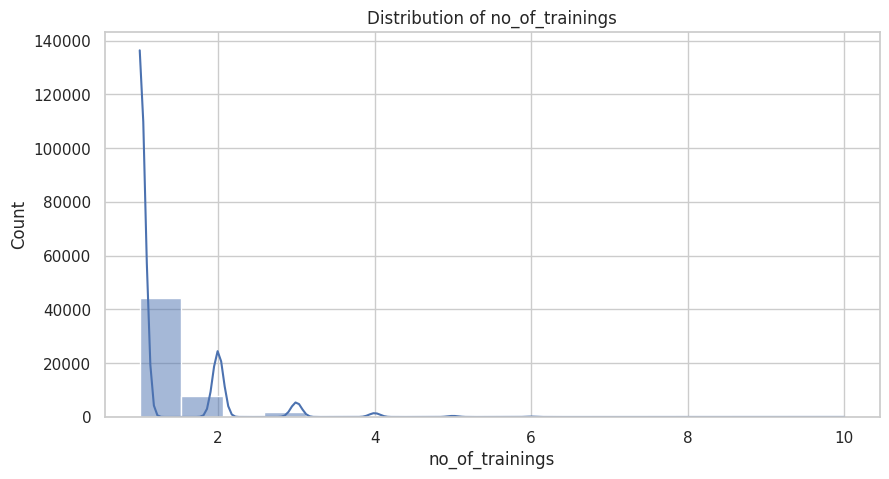

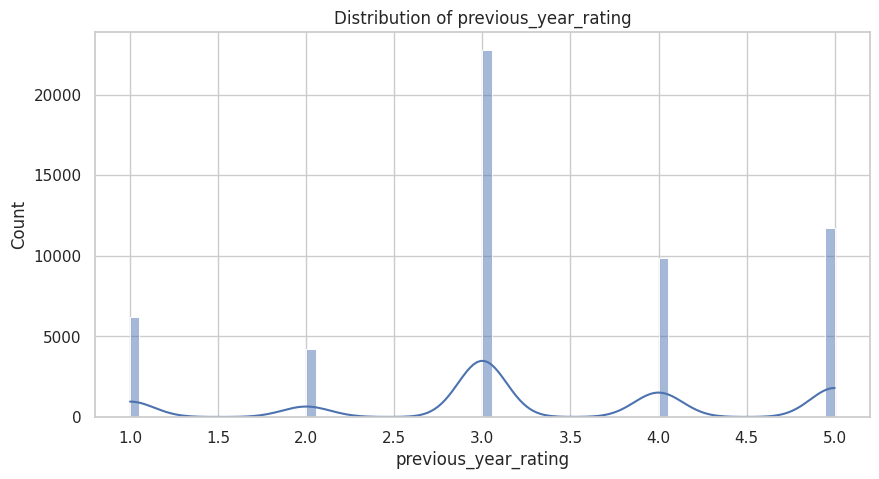

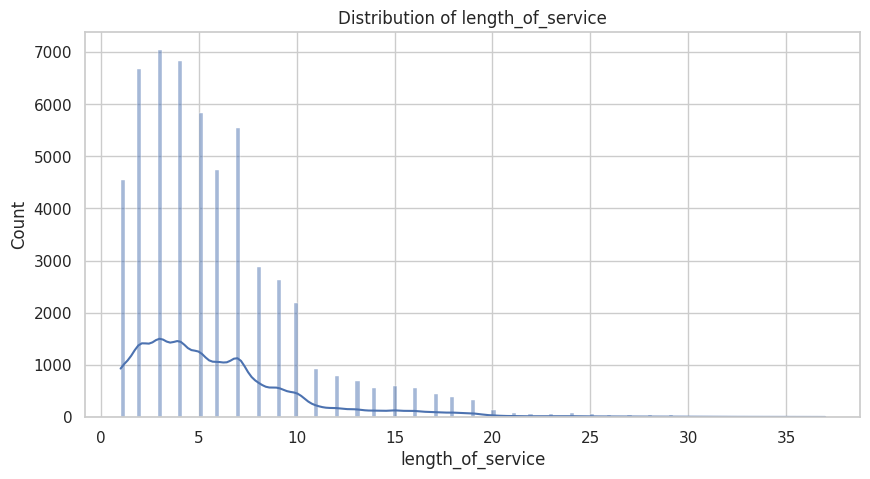

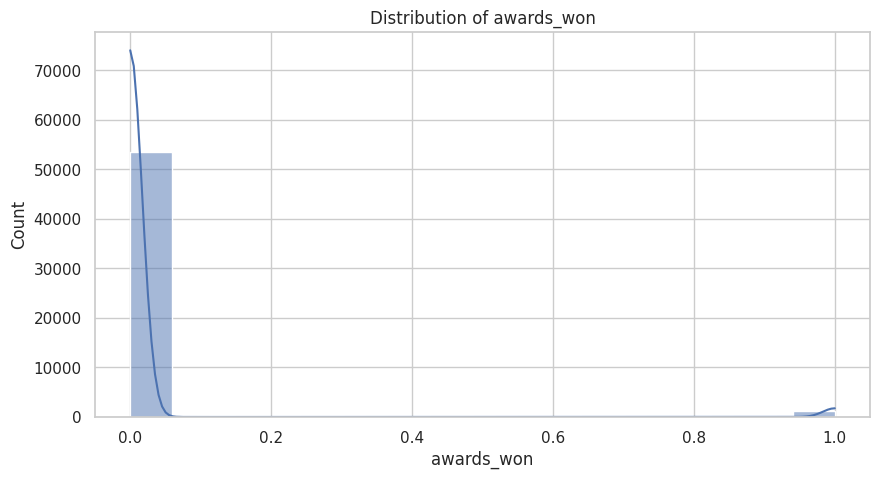

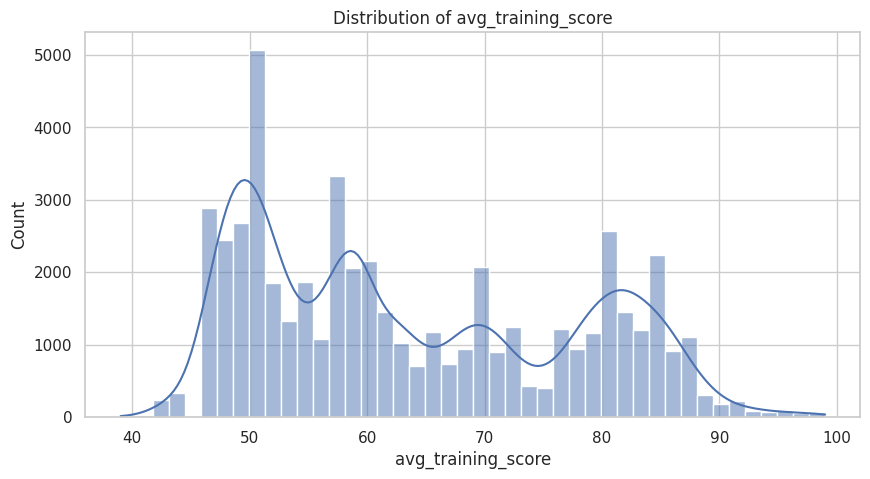

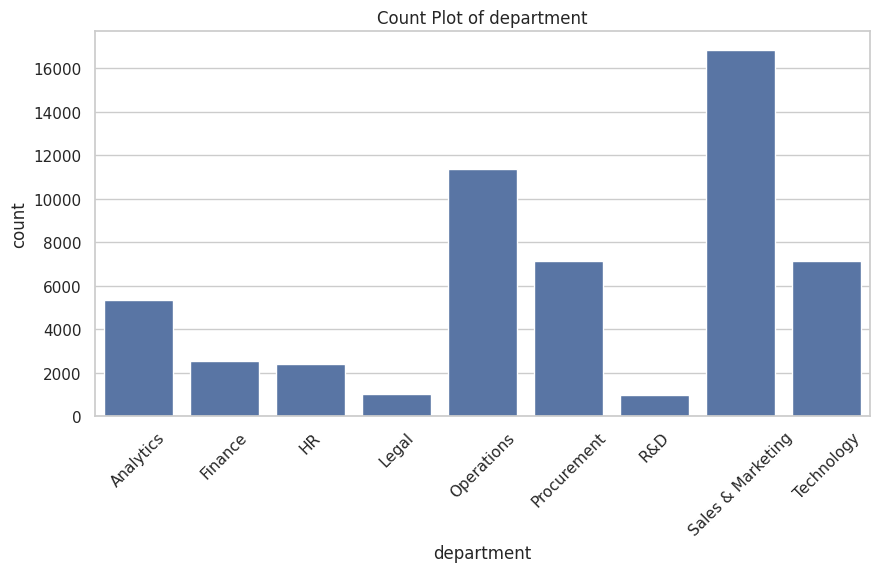

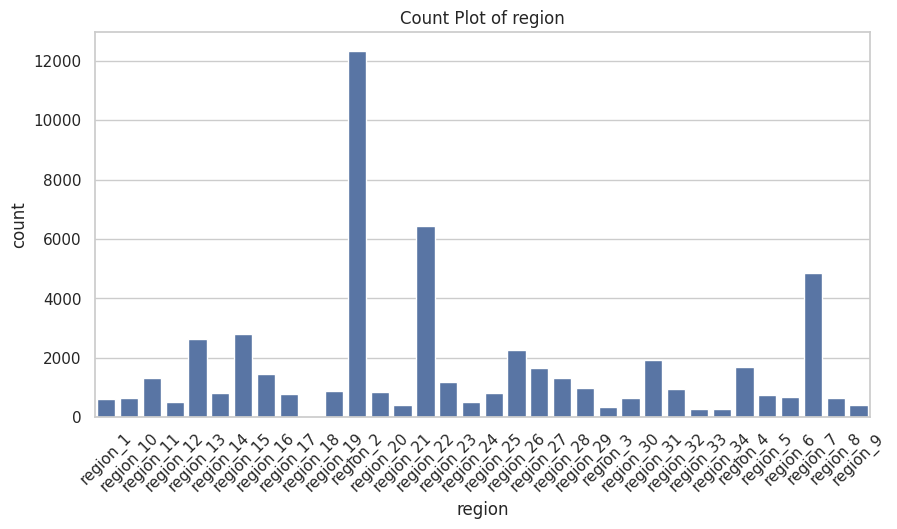

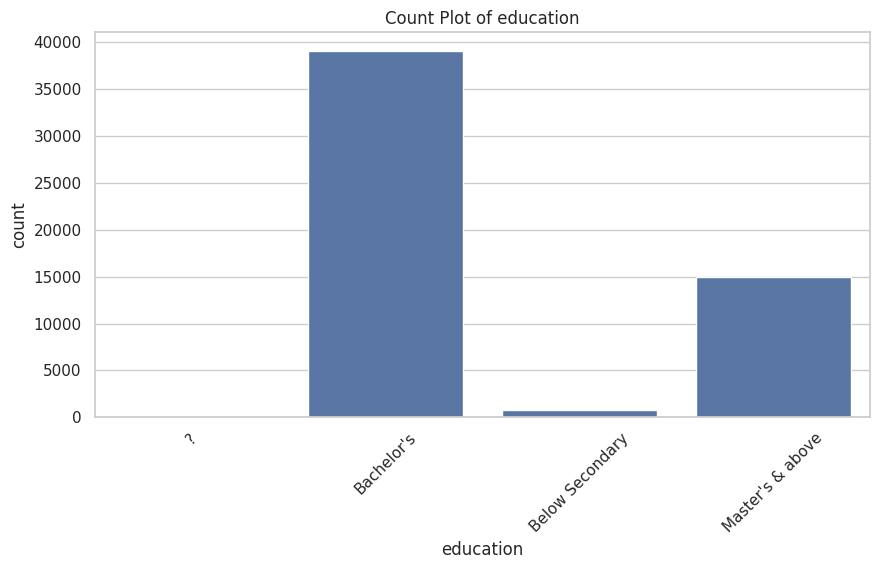

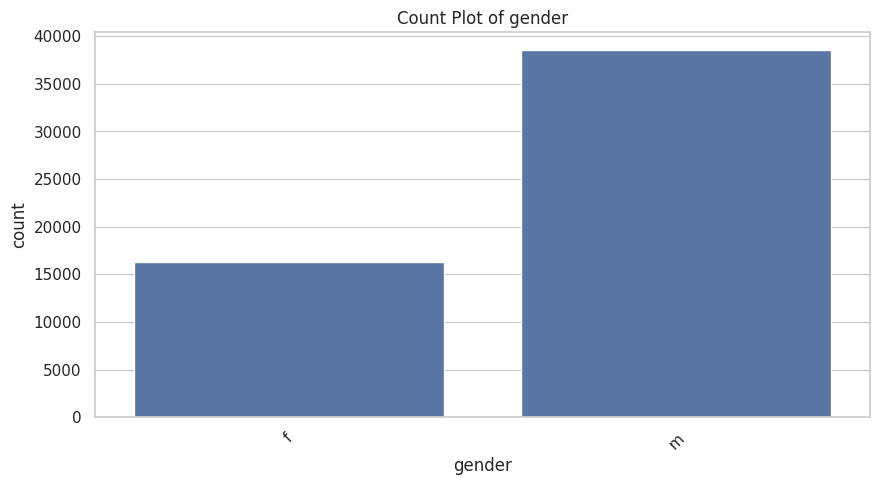

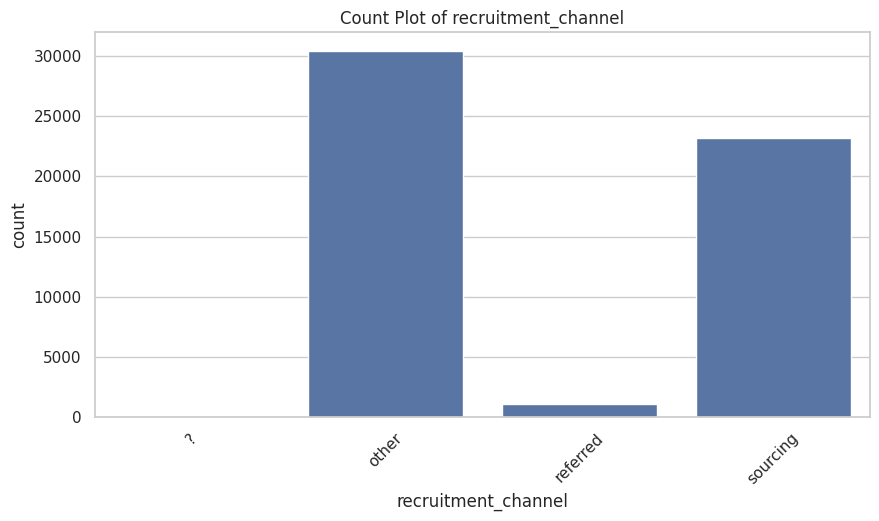

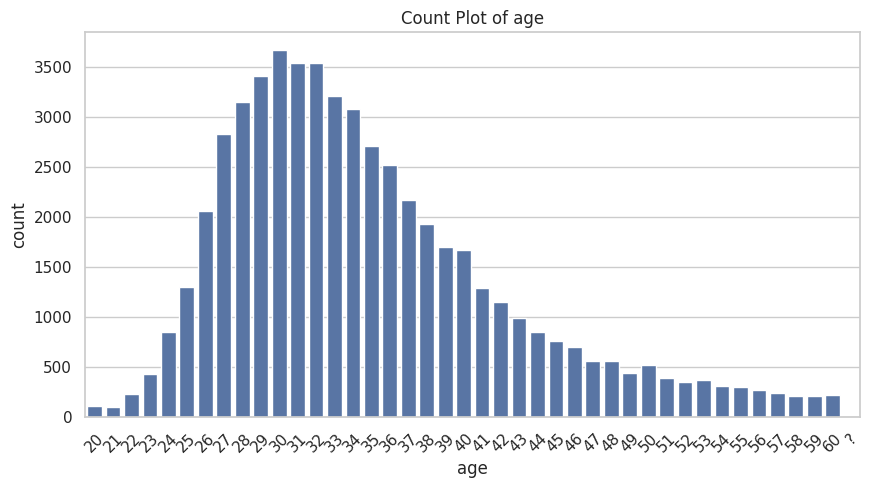

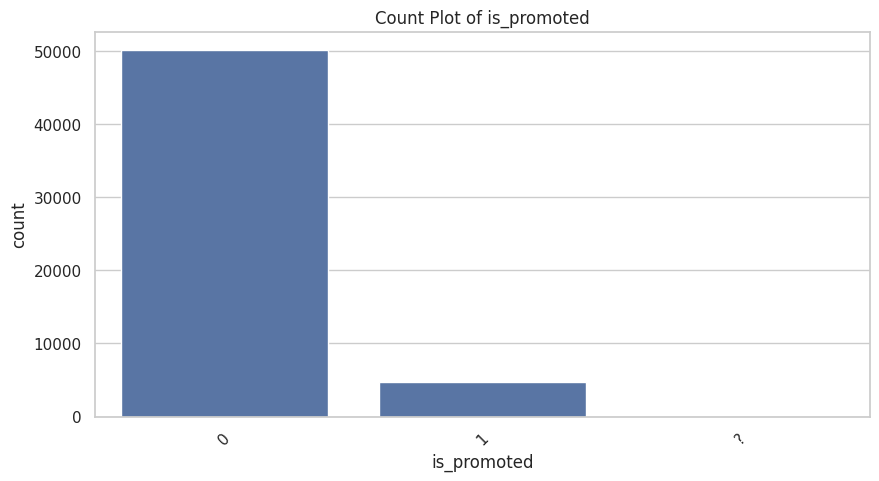

In [ ]:
#Univariate Analysis
# Numeric columns distribution
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical columns count plot
for col in cat_cols:
    plt.figure()
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()


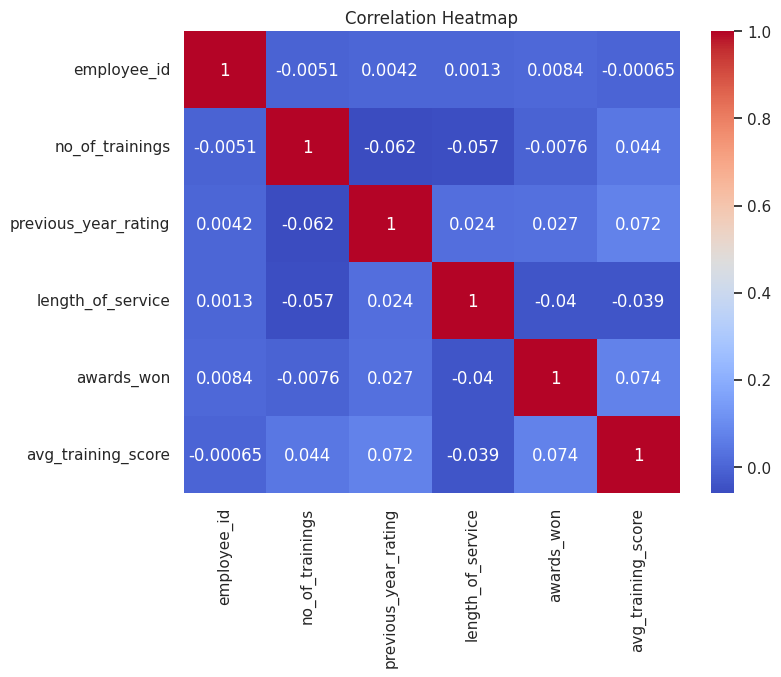

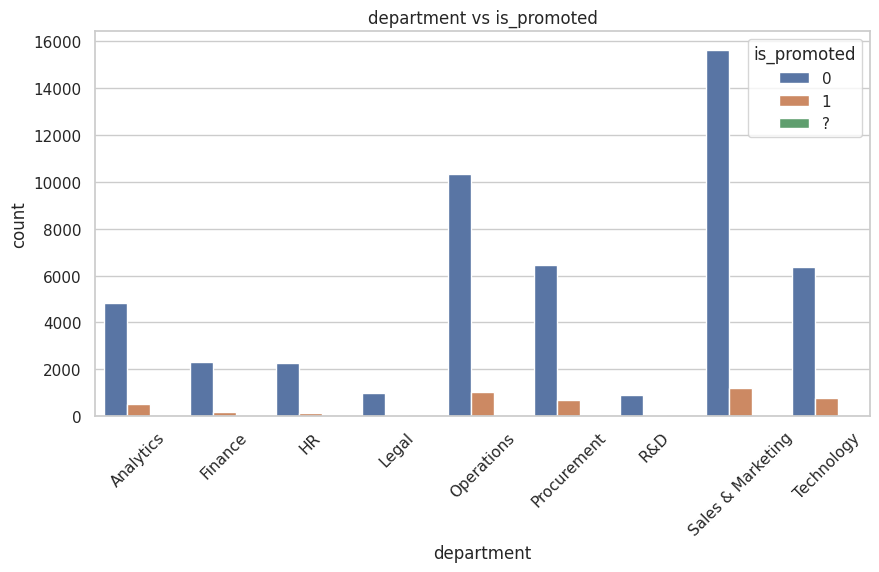

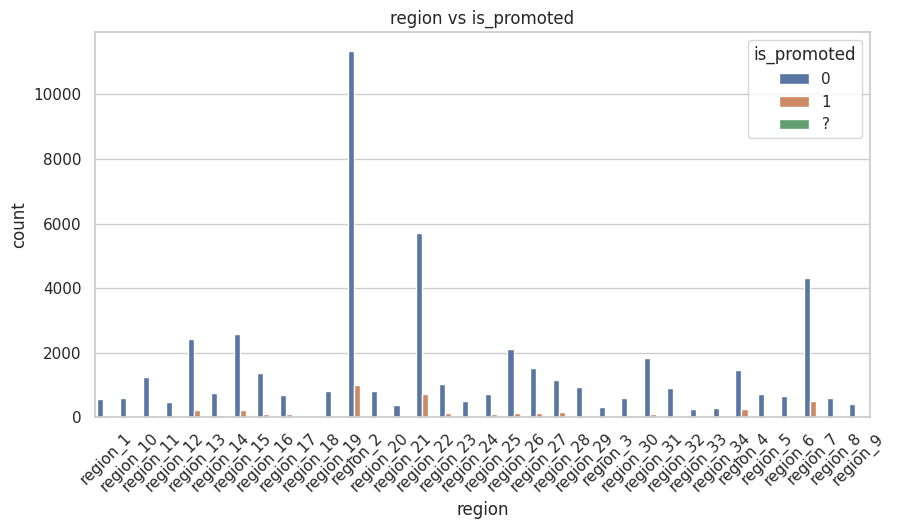

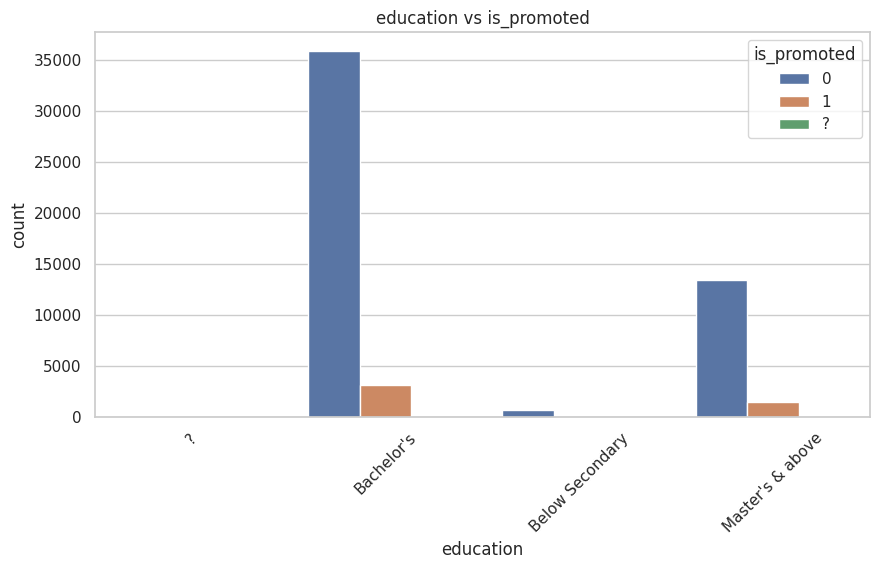

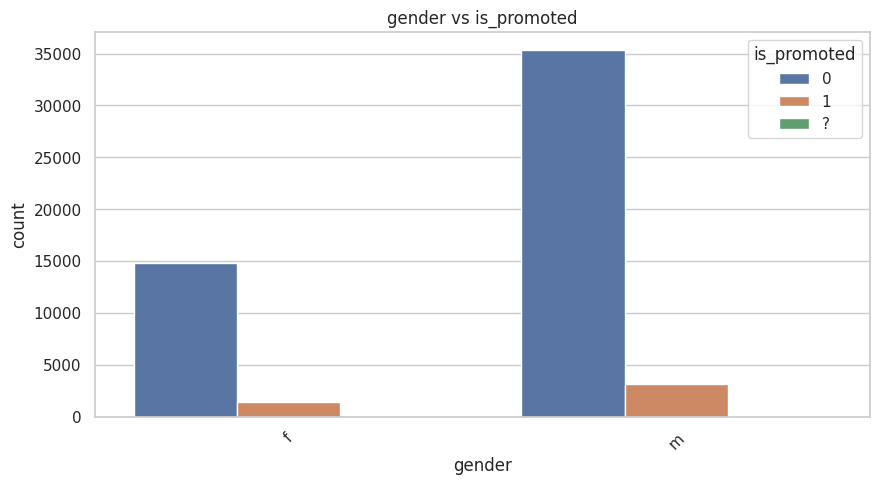

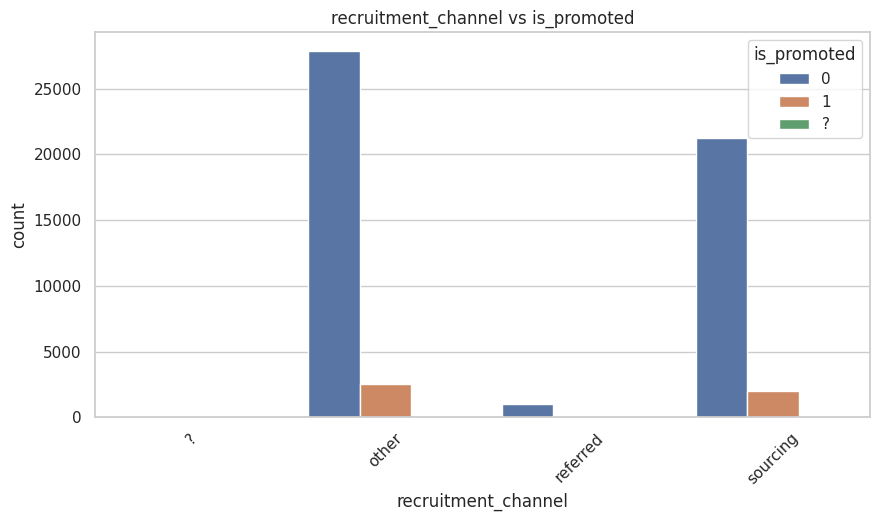

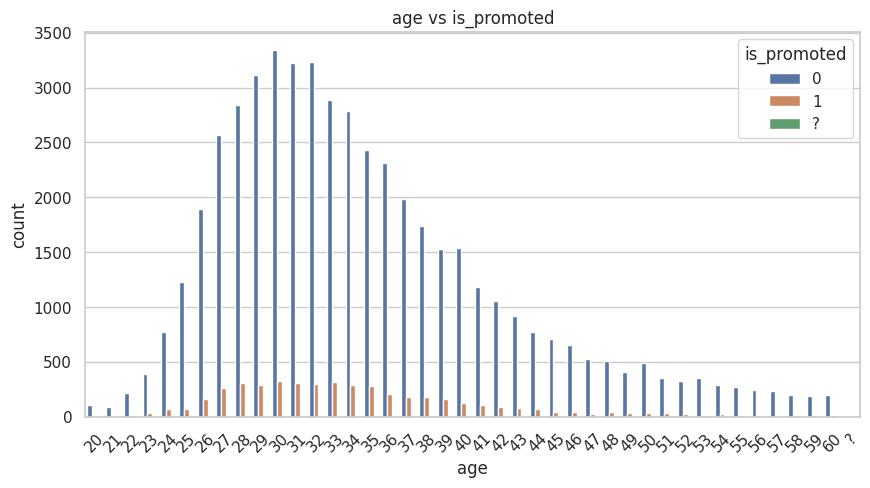

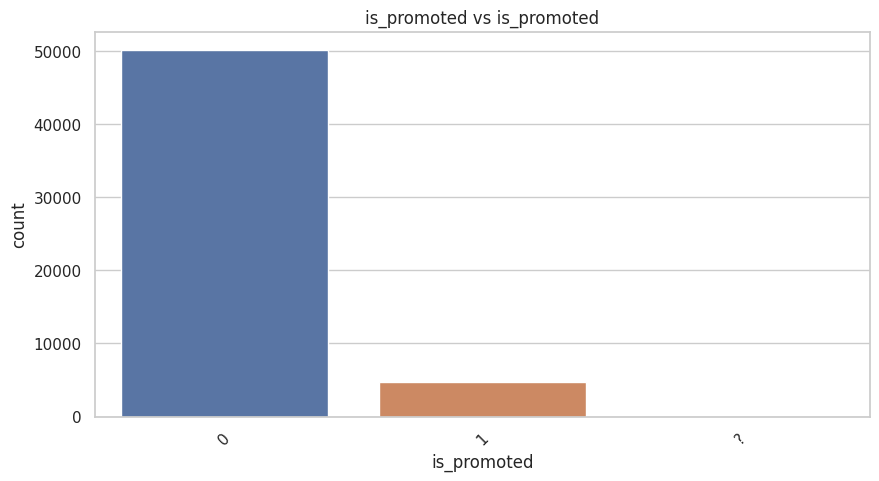

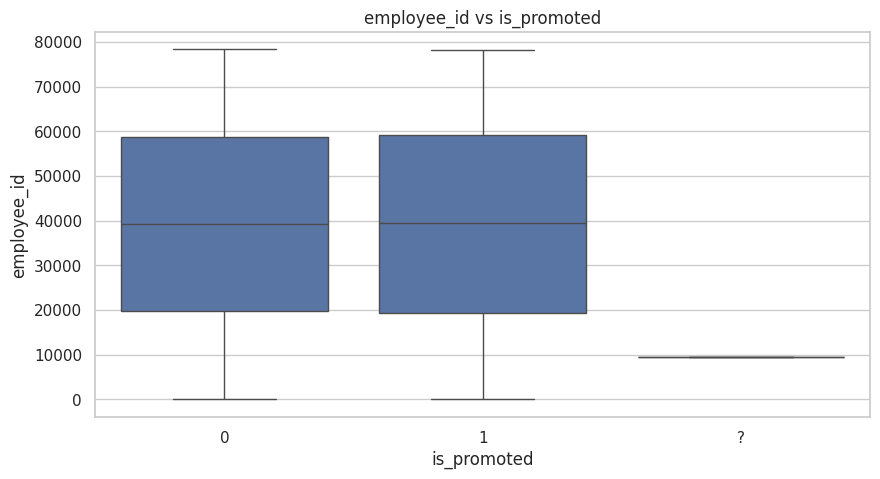

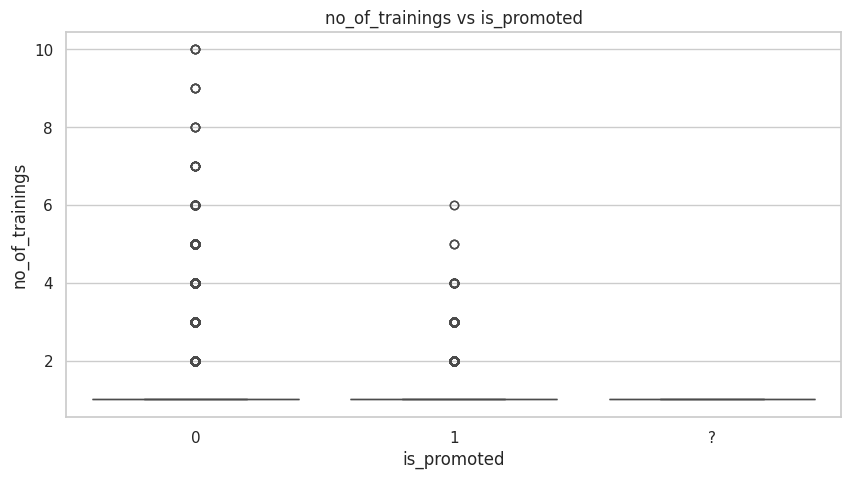

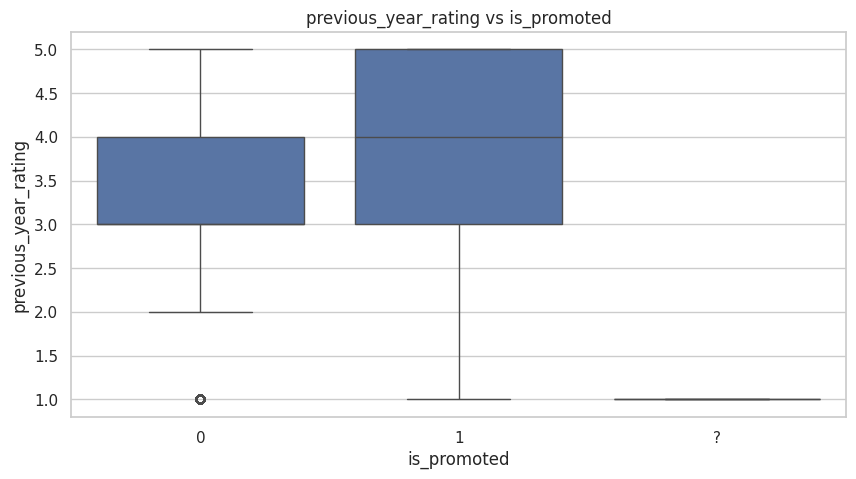

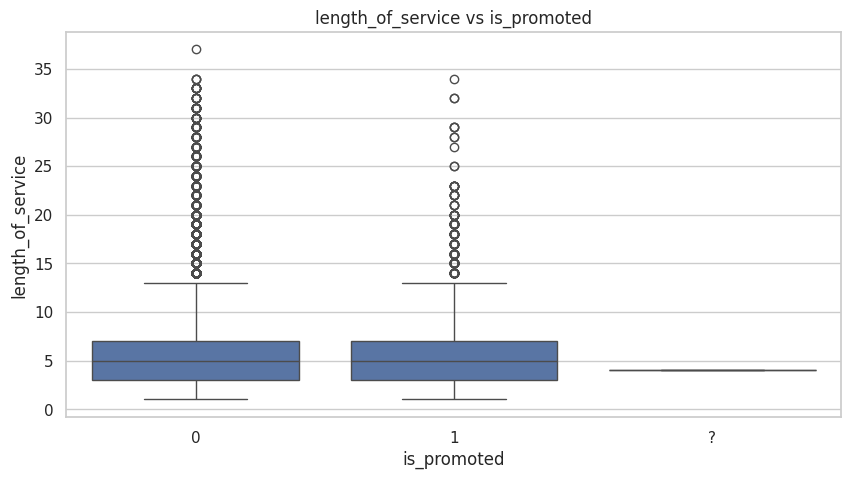

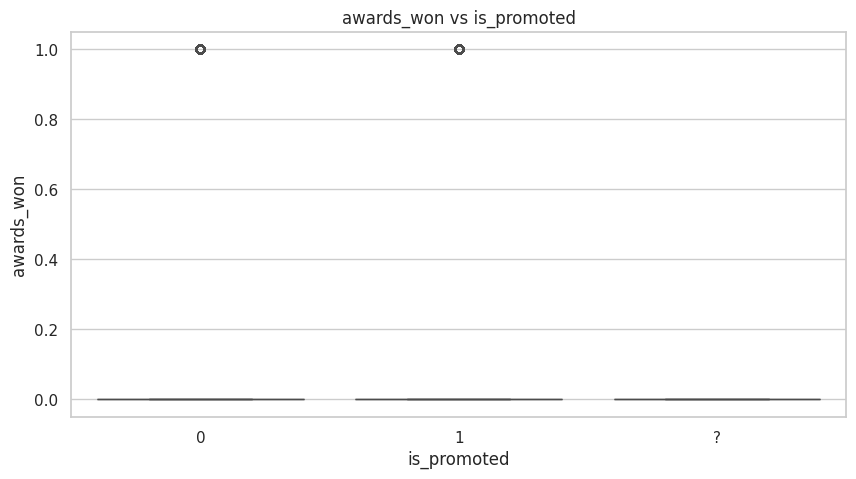

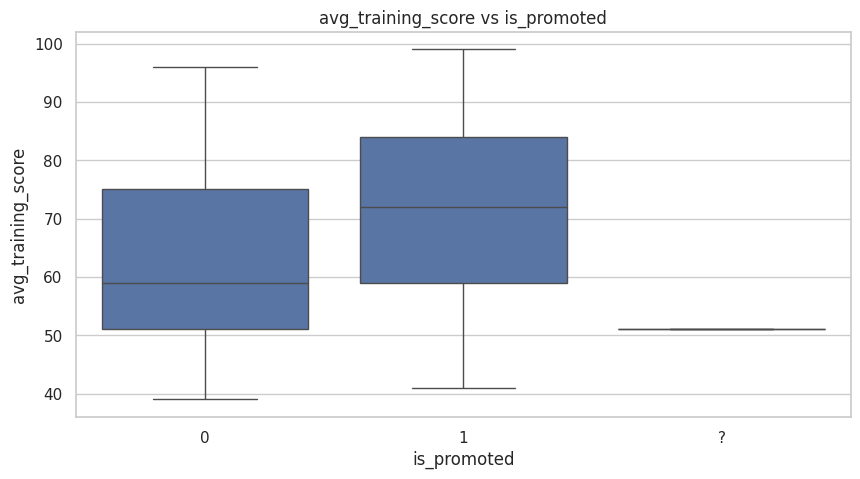

In [ ]:
#Bivariate Analysis
# Correlation Heatmap for numeric columns
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Target column
target = 'is_promoted'

# Categorical vs Target
for col in cat_cols:
    plt.figure()
    sns.countplot(x=df[col], hue=df[target])
    plt.title(f"{col} vs {target}")
    plt.xticks(rotation=45)
    plt.show()

# Numeric vs Target
for col in num_cols:
    if col != target:
        plt.figure()
        sns.boxplot(x=df[target], y=df[col])
        plt.title(f"{col} vs {target}")
        plt.show()


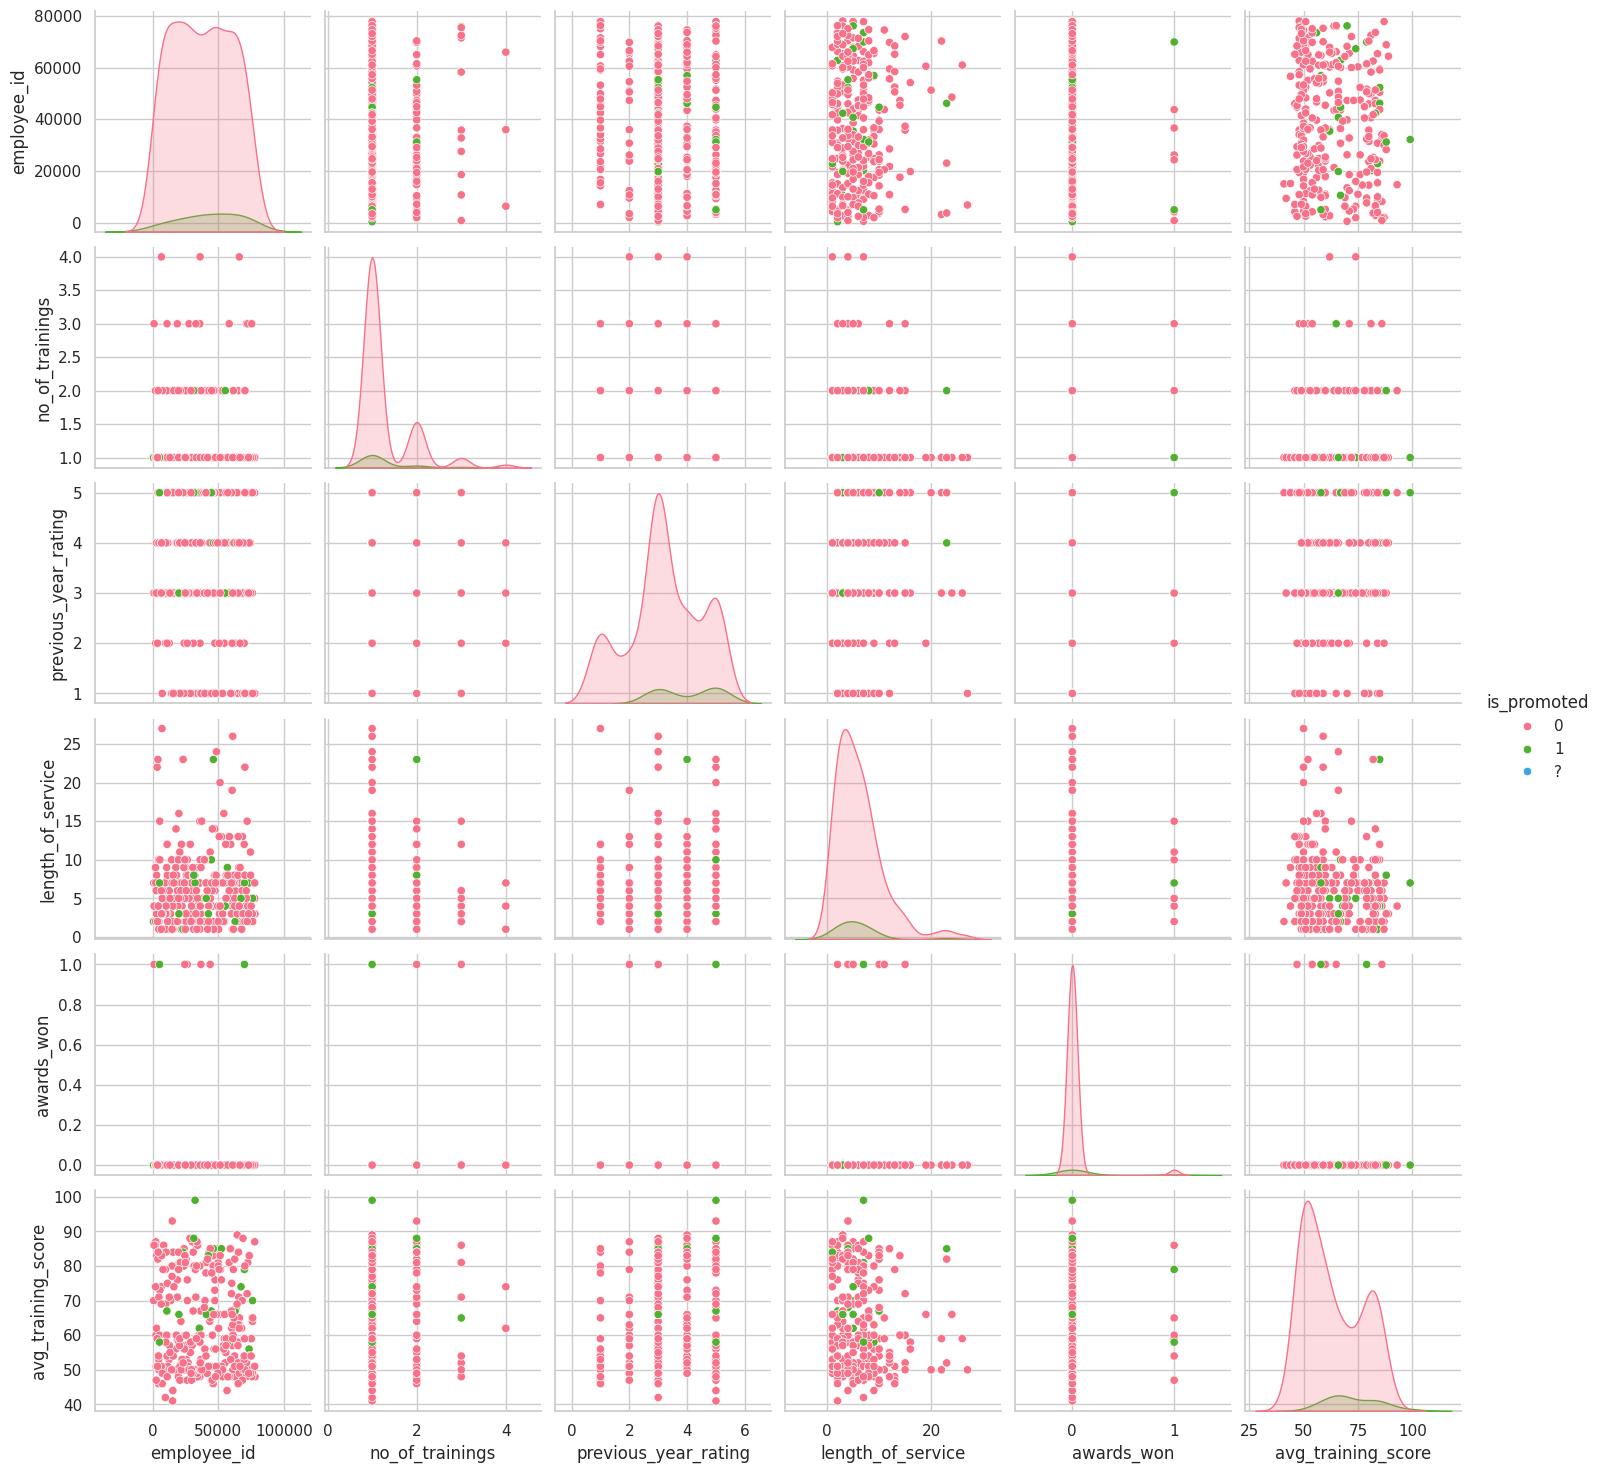

/tmp/ipython-input-2490664938.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['department', target]).size().unstack()


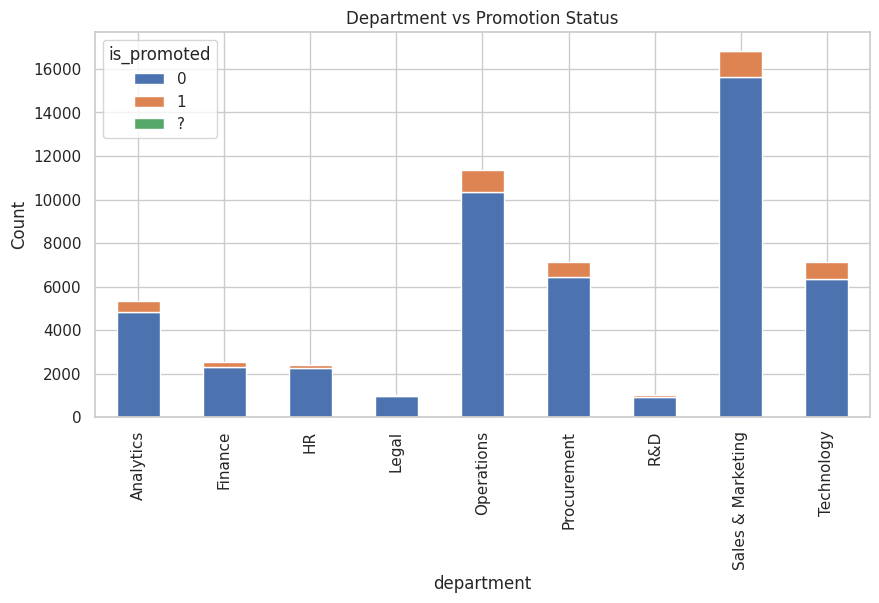

In [ ]:
#Multivariate Analysis
# Pairplot for numeric variables (sampled for speed)
sns.pairplot(df.sample(300), vars=num_cols, hue=target, palette='husl')
plt.show()

# Grouped bar chart
grouped = df.groupby(['department', target]).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.title("Department vs Promotion Status")
plt.ylabel("Count")
plt.show()


In [ ]:
print("\n Skewness of Numeric Columns:")
print(df[num_cols].skew())


 Skewness of Numeric Columns:
employee_id            -0.003128
no_of_trainings         3.445434
previous_year_rating   -0.260858
length_of_service       1.738061
awards_won              6.338852
avg_training_score      0.419129
dtype: float64


In [ ]:
print("Quantiles of Numeric Columns:")
print(df[num_cols].quantile([0.25, 0.5, 0.75]))

Quantiles of Numeric Columns:
      employee_id  no_of_trainings  previous_year_rating  length_of_service  \
0.25     19669.75              1.0                   3.0                3.0   
0.50     39225.50              1.0                   3.0                5.0   
0.75     58730.50              1.0                   4.0                7.0   

      awards_won  avg_training_score  
0.25         0.0                51.0  
0.50         0.0                60.0  
0.75         0.0                77.0  


In [ ]:
for col in cat_cols:
    print(f"\nFrequency distribution of {col}:")
    print(df[col].value_counts(normalize=True))


Frequency distribution of department:
department
Sales & Marketing    0.307254
Operations           0.207050
Procurement          0.130236
Technology           0.130236
Analytics            0.097650
Finance              0.046271
HR                   0.044118
Legal                0.018957
R&D                  0.018227
Name: proportion, dtype: float64

Frequency distribution of region:
region
region_2     0.225204
region_22    0.117282
region_7     0.088363
region_15    0.051233
region_13    0.048314
region_26    0.041235
region_31    0.035305
region_4     0.031072
region_27    0.030269
region_16    0.026730
region_28    0.024048
region_11    0.023993
region_23    0.021438
region_29    0.018136
region_32    0.017242
region_19    0.015947
region_20    0.015509
region_14    0.015089
region_25    0.014943
region_17    0.014523
region_5     0.013976
region_6     0.012589
region_30    0.011987
region_8     0.011951
region_10    0.011823
region_1     0.011130
region_24    0.009269
region_12  

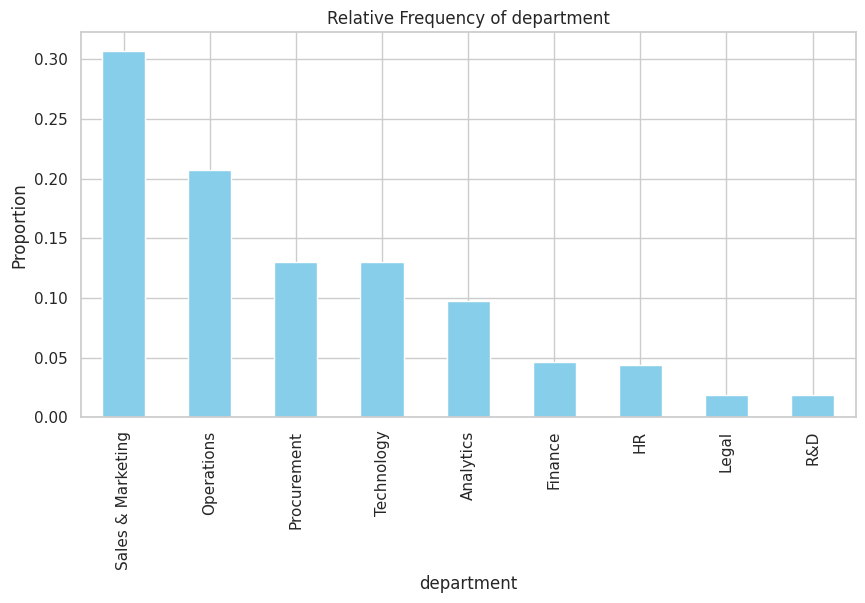

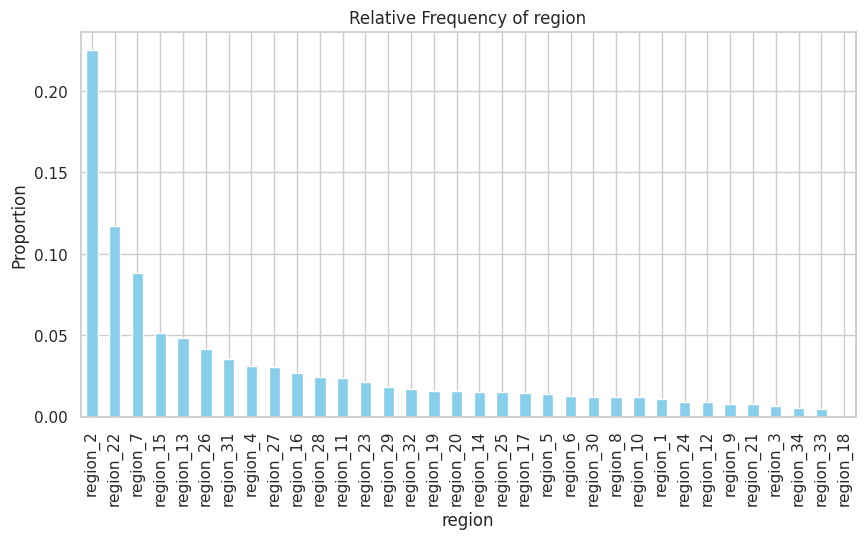

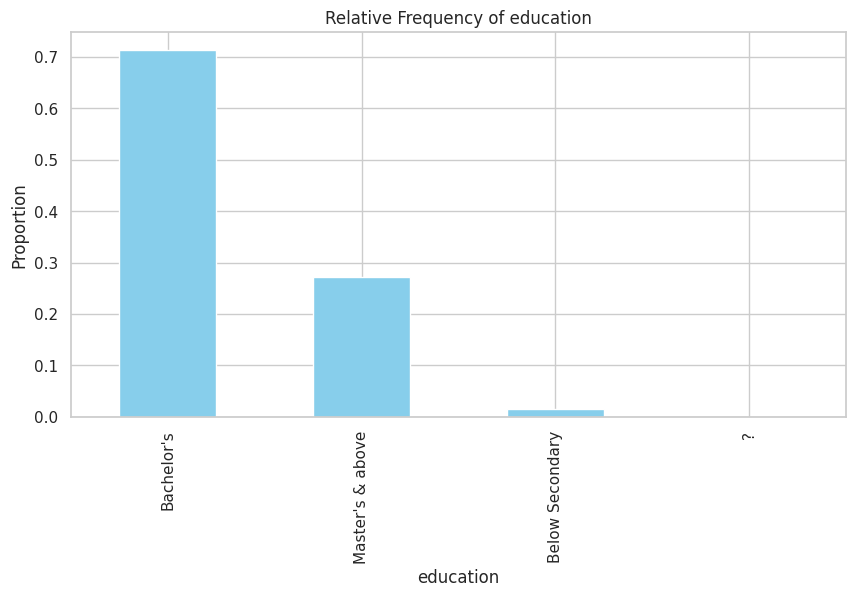

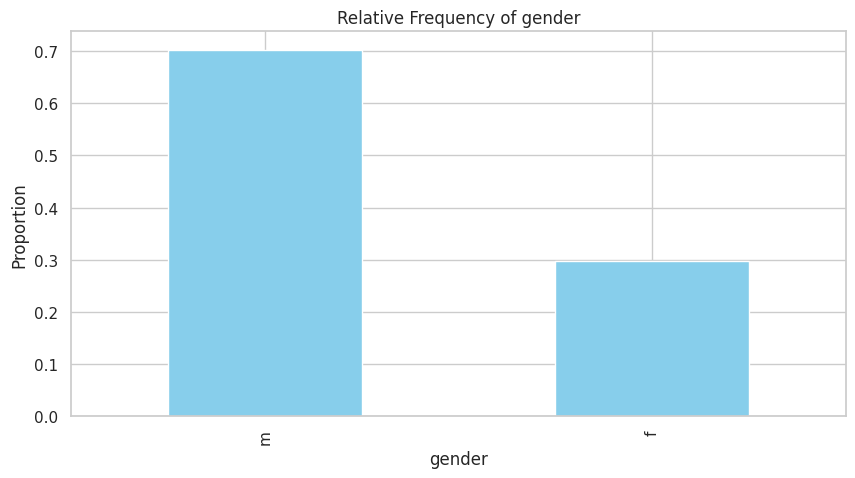

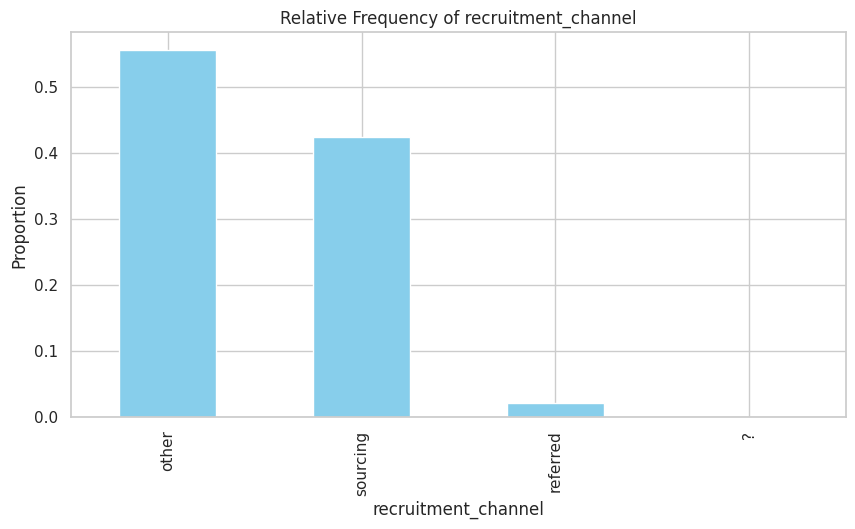

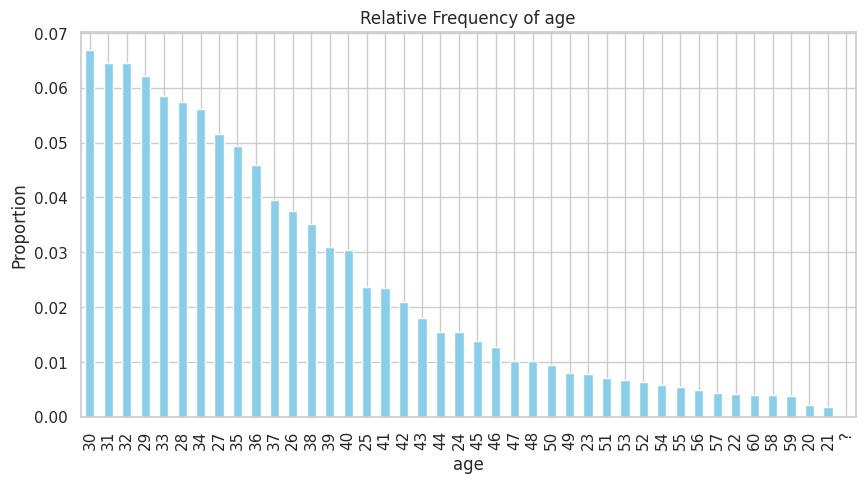

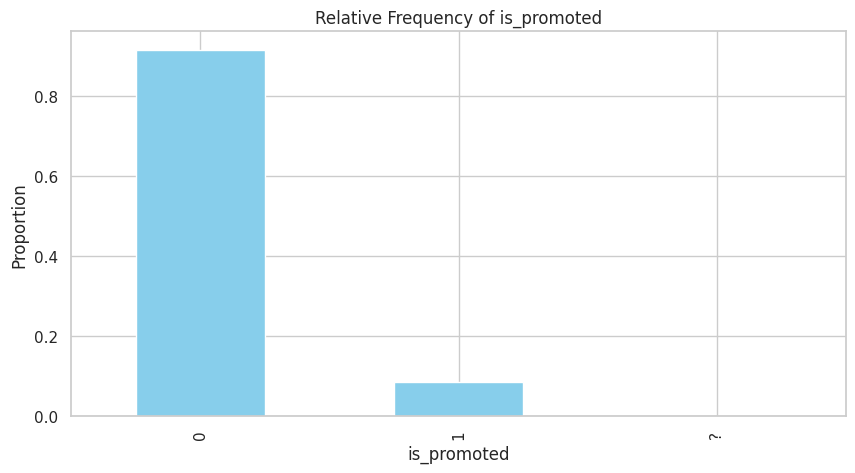

In [ ]:
for col in cat_cols:
    plt.figure()
    df[col].value_counts(normalize=True).plot(kind='bar', color="skyblue")
    plt.title(f"Relative Frequency of {col}")
    plt.ylabel("Proportion")
    plt.show()

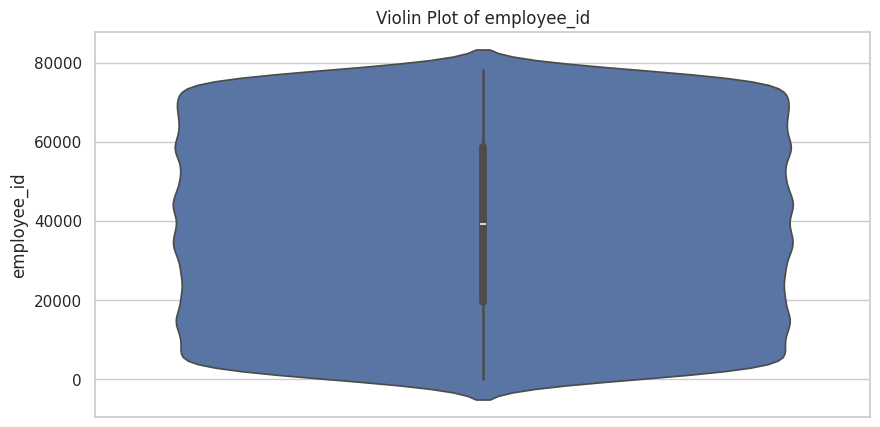

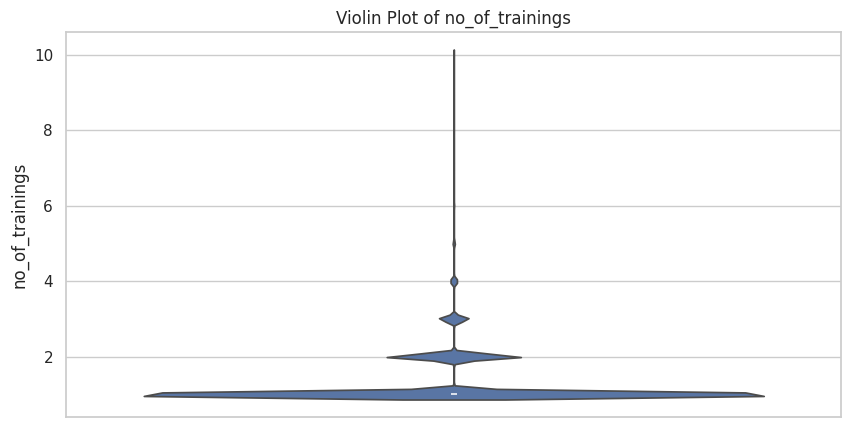

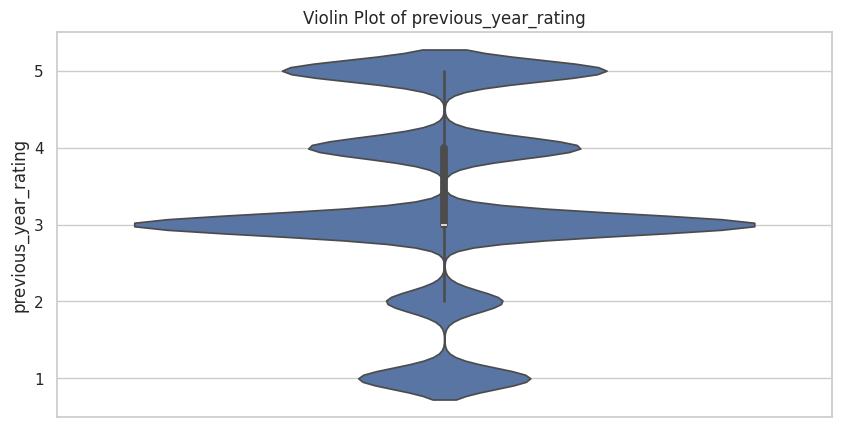

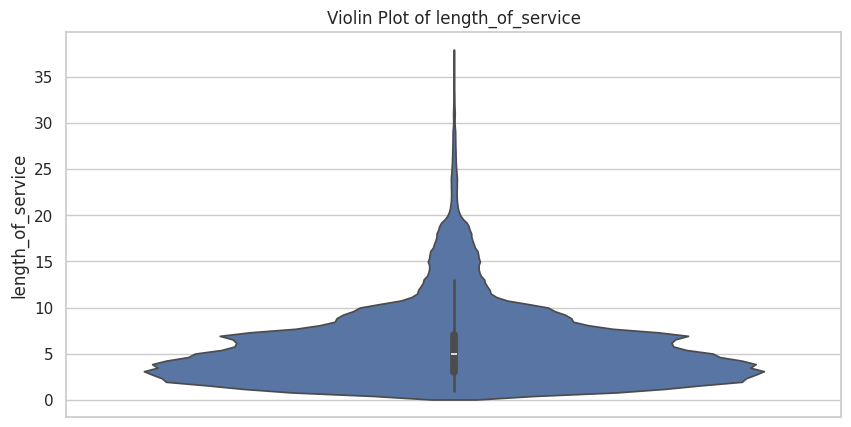

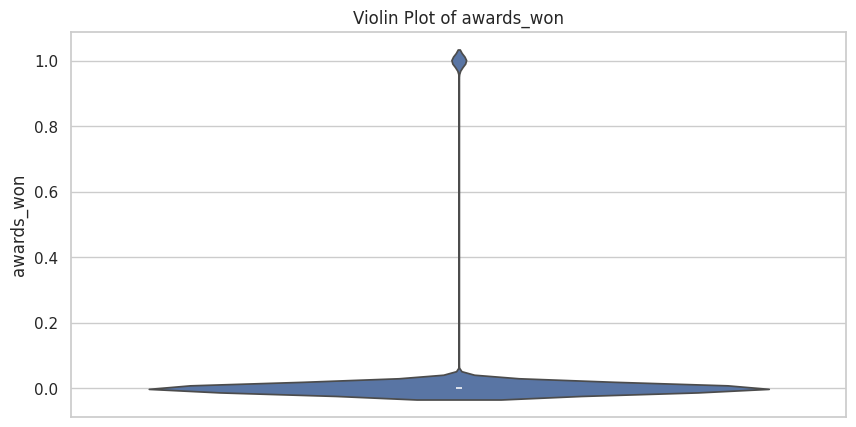

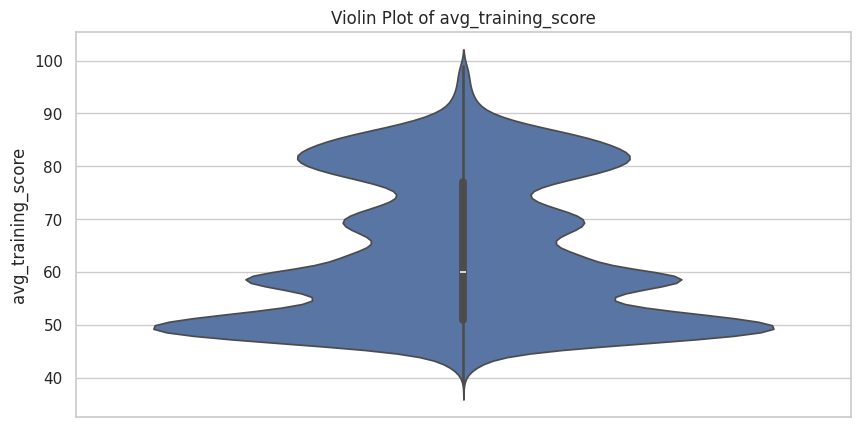

In [ ]:
for col in num_cols:
    plt.figure()
    sns.violinplot(y=df[col])
    plt.title(f"Violin Plot of {col}")
    plt.show()

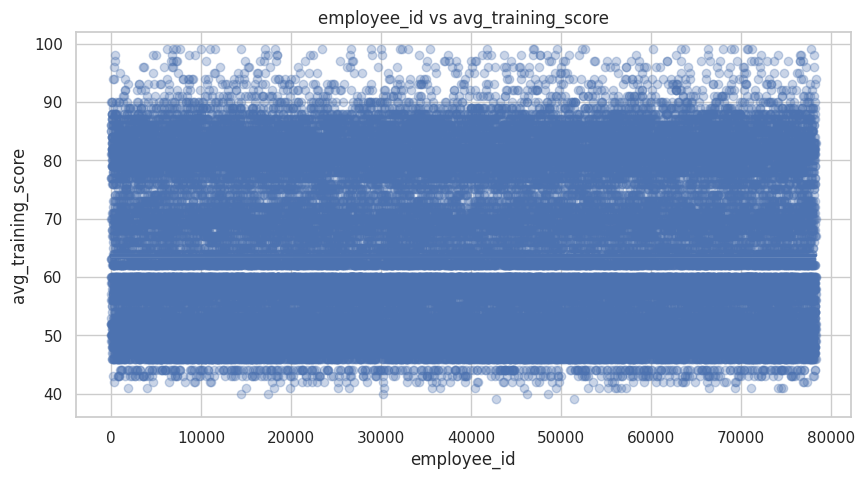

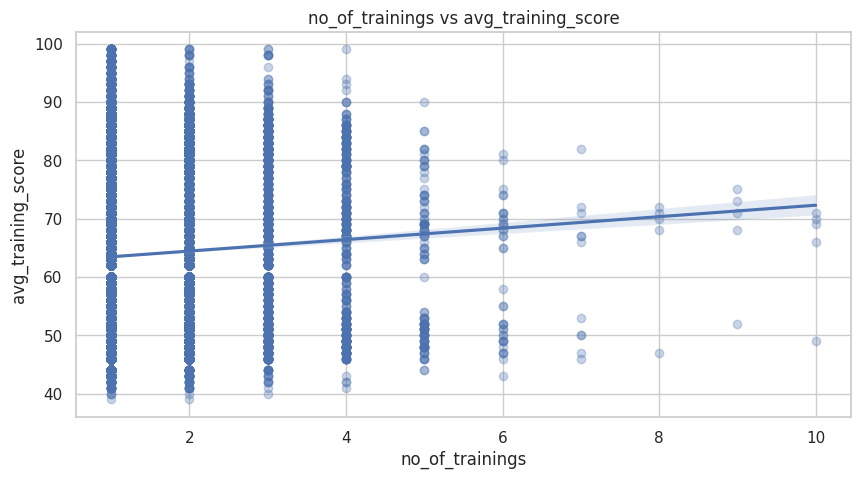

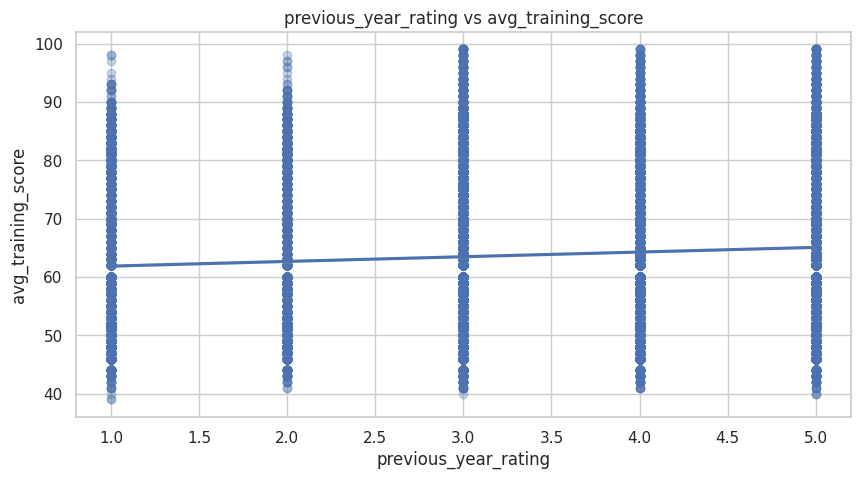

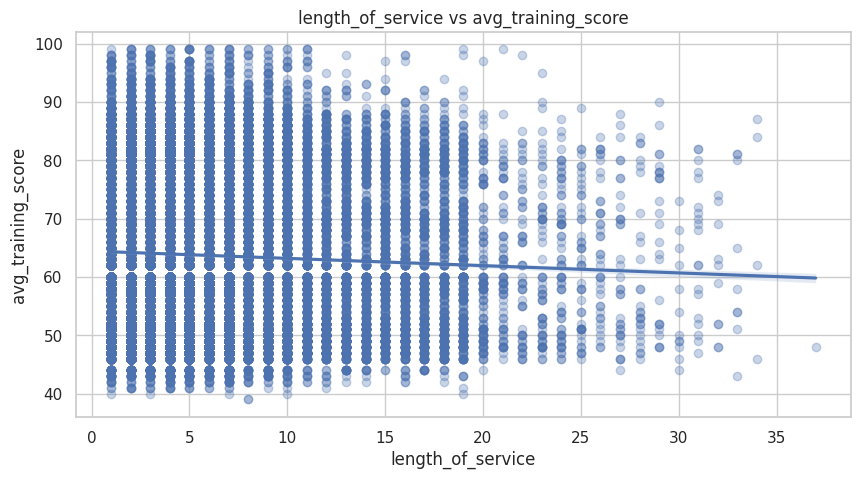

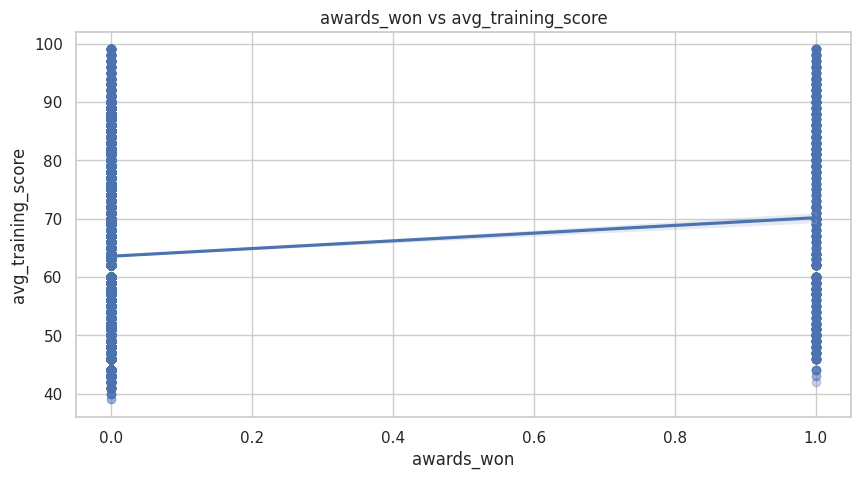

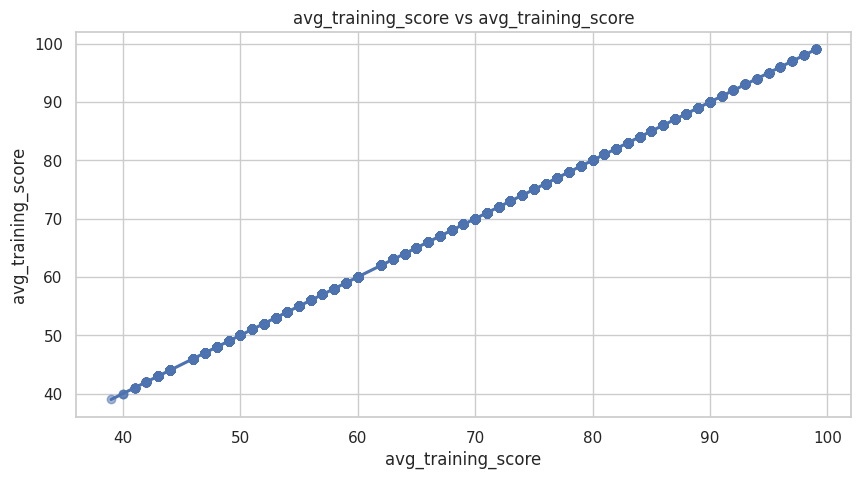

In [ ]:
# 2D ANALYSIS
# Numerical vs Numerical (Scatter plots with regression lines)
for col in num_cols:
    if col != target:
        plt.figure()
        sns.regplot(x=df[col], y=df["avg_training_score"], scatter_kws={'alpha':0.3})
        plt.title(f"{col} vs avg_training_score")
        plt.show()

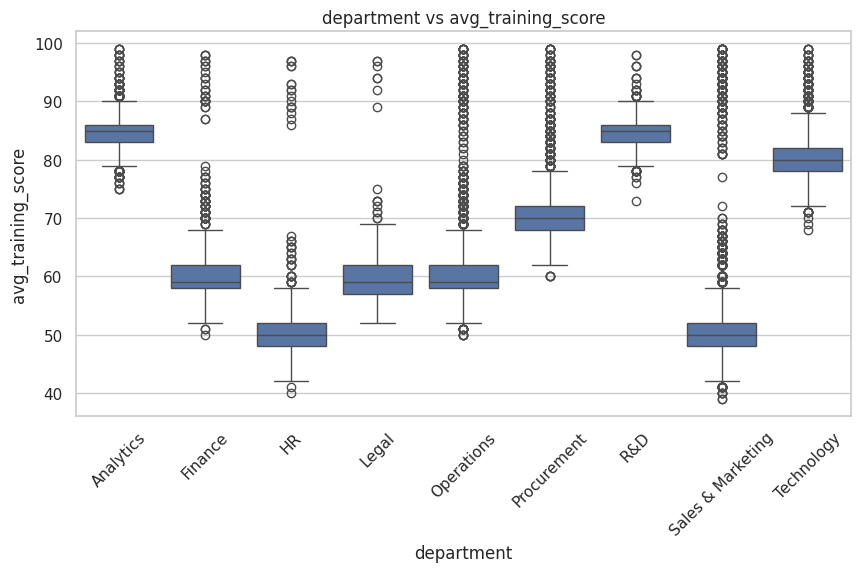

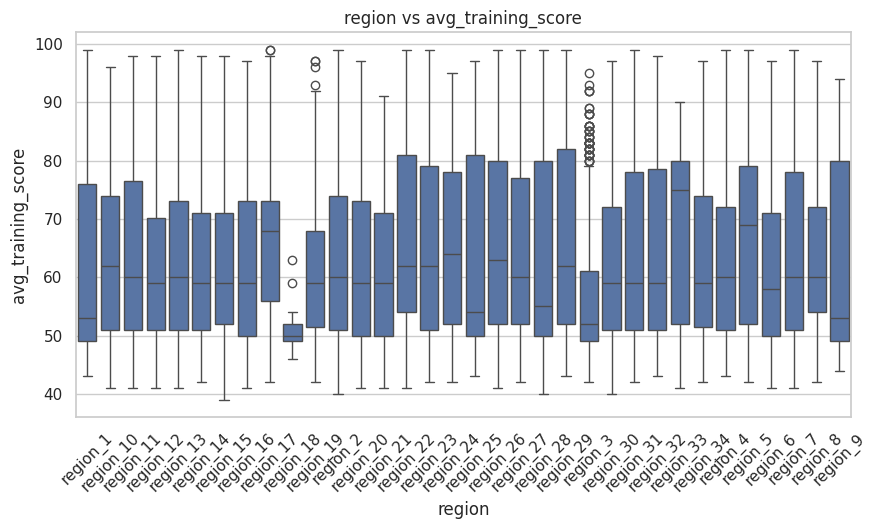

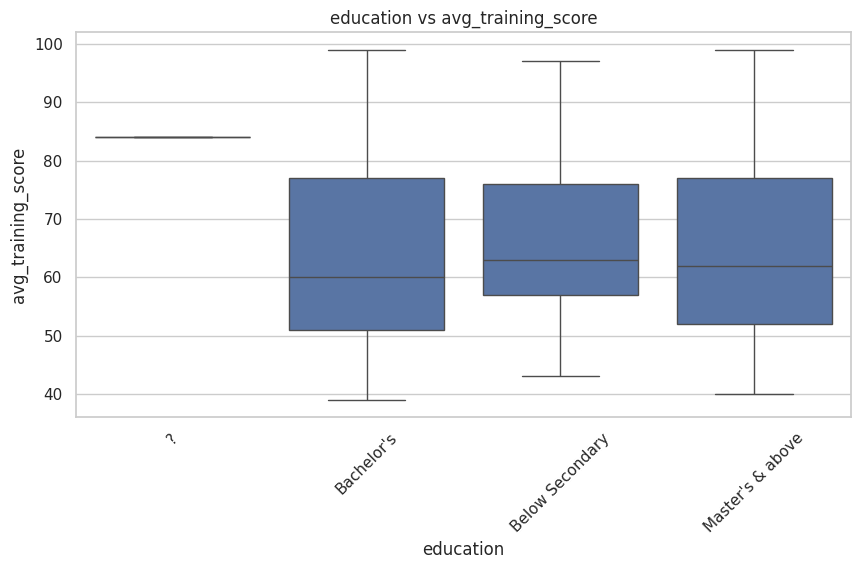

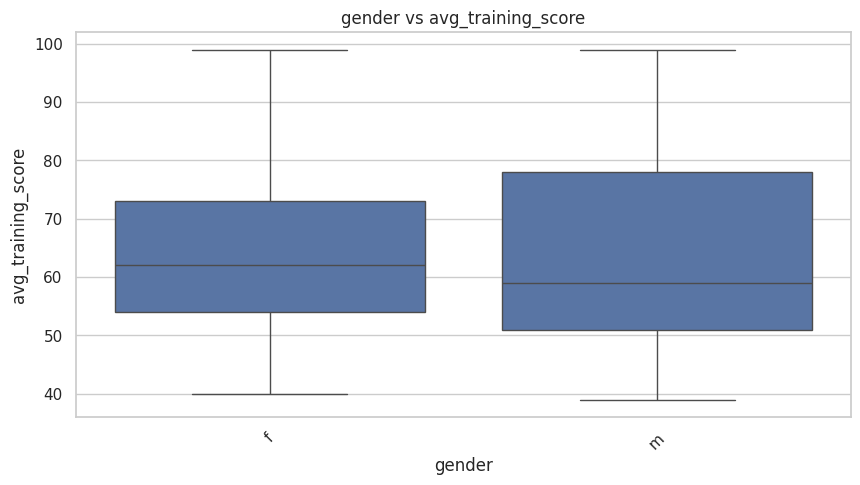

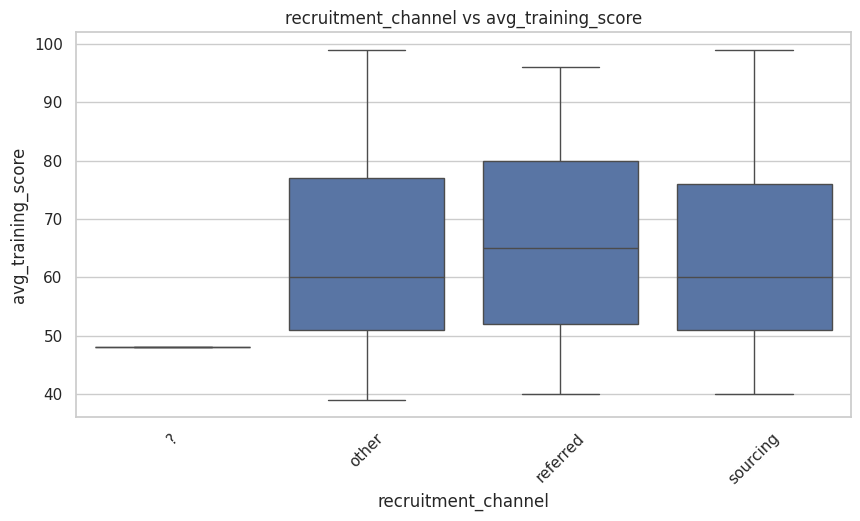

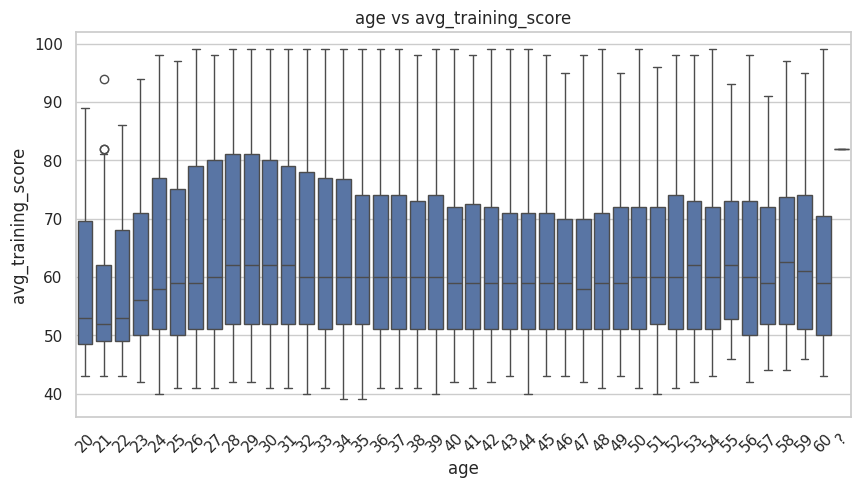

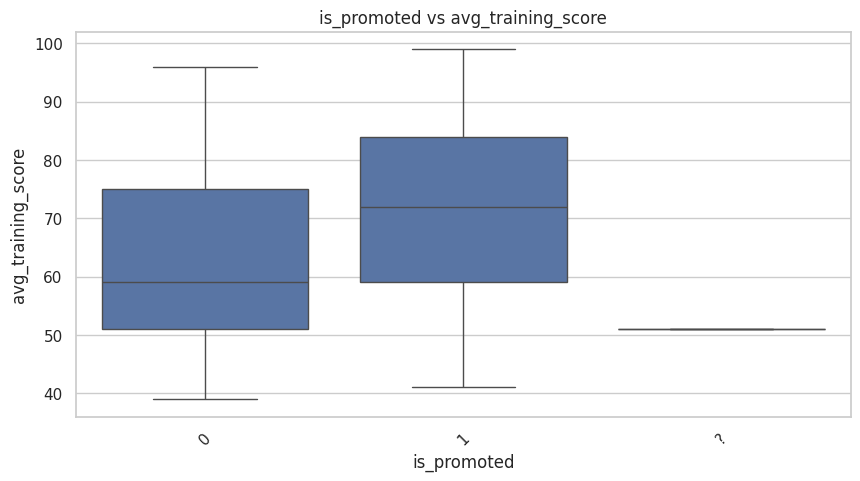

In [ ]:
# Numerical vs Categorical (Boxplots)
for col in cat_cols:
    plt.figure()
    sns.boxplot(x=df[col], y=df["avg_training_score"])
    plt.xticks(rotation=45)
    plt.title(f"{col} vs avg_training_score")
    plt.show()

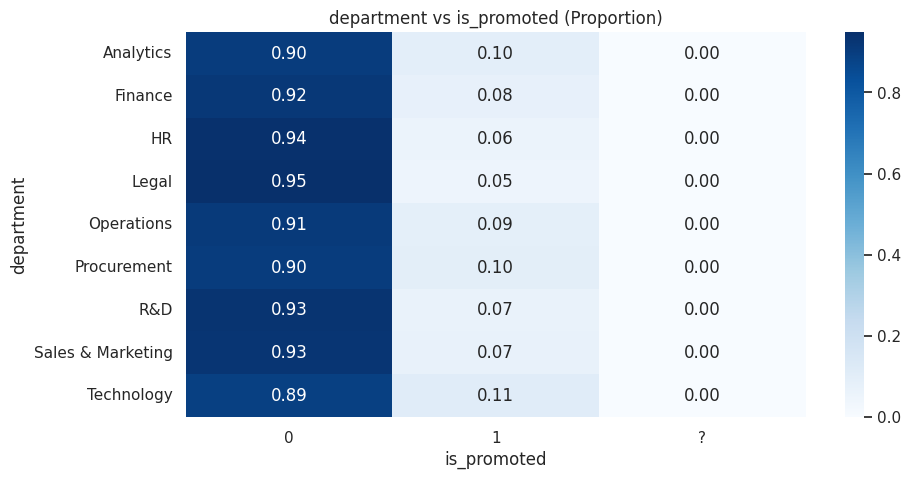

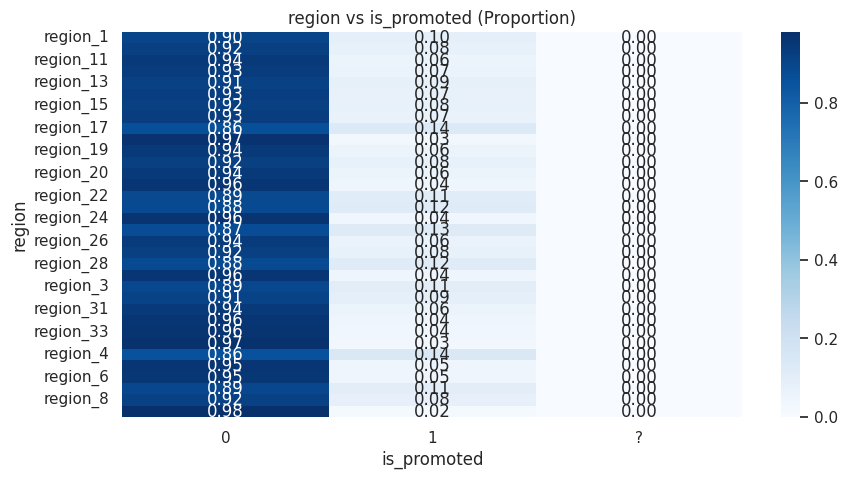

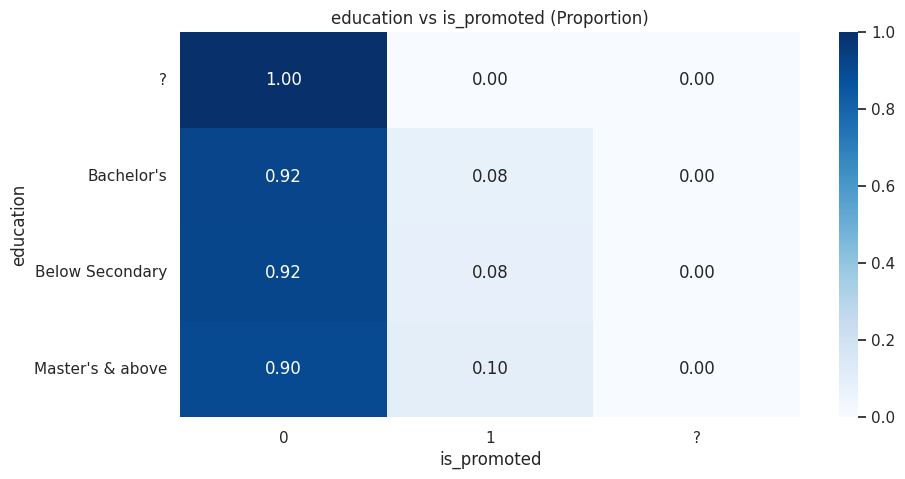

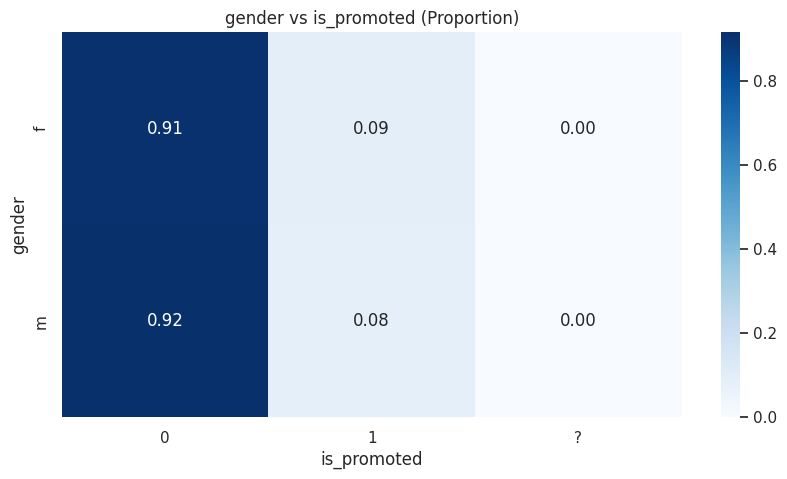

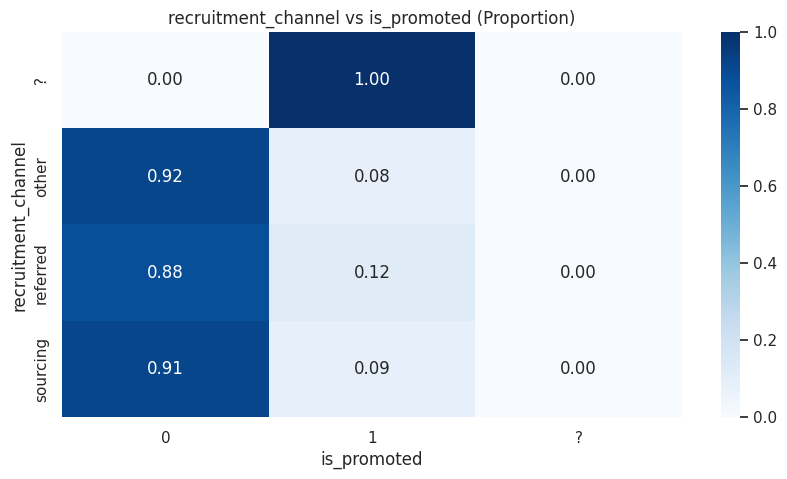

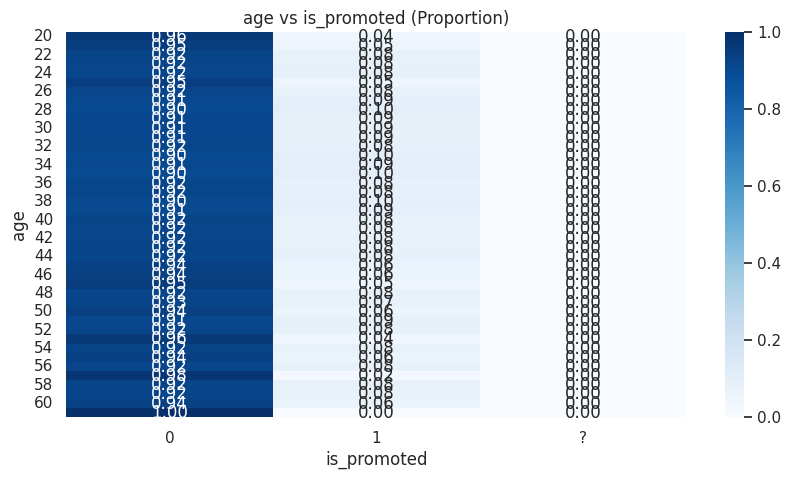

In [ ]:
# Categorical vs Categorical (Heatmap of cross-tab)
for col in cat_cols:
    if col != target:
        ct = pd.crosstab(df[col], df[target], normalize="index")
        sns.heatmap(ct, annot=True, cmap="Blues", fmt=".2f")
        plt.title(f"{col} vs {target} (Proportion)")
        plt.show()

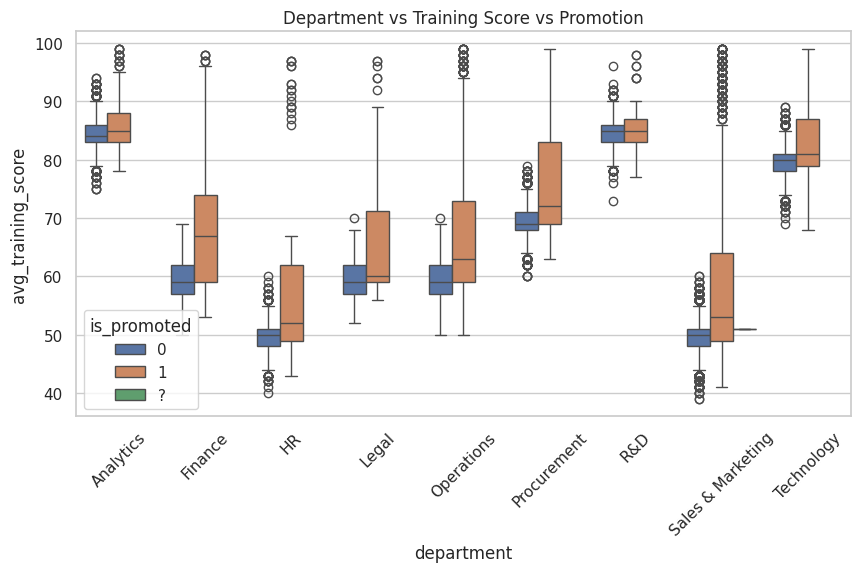

In [ ]:
# 3D ANALYSIS
# Example: Boxplot with hue (3 variables at once)
plt.figure(figsize=(10,5))
sns.boxplot(x="department", y="avg_training_score", hue="is_promoted", data=df)
plt.title("Department vs Training Score vs Promotion")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Select numeric features (excluding the target)
num_cols = df.select_dtypes(include=np.number).columns.tolist()
if target in num_cols:
    num_cols.remove(target)   # remove is_promoted if it's numeric (safety check)

X = df[num_cols]

In [ ]:
X = df[num_cols].fillna(df[num_cols].median())

In [ ]:
# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = X_pca[:, 0], X_pca[:, 1]

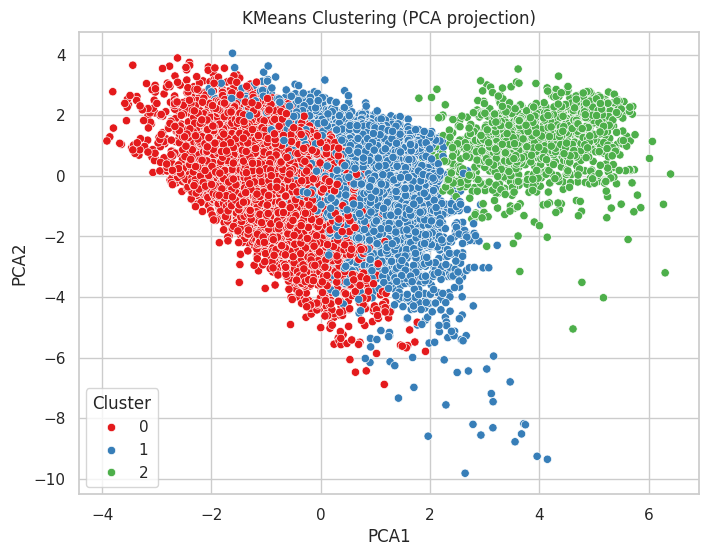

In [ ]:
# Scatterplot of clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="Set1")
plt.title("KMeans Clustering (PCA projection)")
plt.show()

In [ ]:
# Cluster sizes
print("\n Cluster Sizes:")
print(df["Cluster"].value_counts())


 Cluster Sizes:
Cluster
0    34007
1    19531
2     1270
Name: count, dtype: int64


In [ ]:
print("\n Cluster Means (numeric features):")
print(df.groupby("Cluster")[num_cols].mean())


 Cluster Means (numeric features):
          employee_id  no_of_trainings  previous_year_rating  \
Cluster                                                        
0        39254.138942         1.201370              3.285941   
1        39014.014951         1.344888              3.323127   
2        40430.595276         1.222835              3.514173   

         length_of_service  awards_won  avg_training_score  
Cluster                                                     
0                 6.101509         0.0           54.206335  
1                 5.526496         0.0           78.655870  
2                 4.759843         1.0           70.161369  


In [ ]:
print("\nPromotion Rate per Cluster:")
print(df.groupby("Cluster")["is_promoted"].value_counts(normalize=True).unstack().fillna(0))


Promotion Rate per Cluster:
is_promoted         0         1         ?
Cluster                                  
0            0.947481  0.052489  0.000029
1            0.881010  0.118990  0.000000
2            0.559843  0.440157  0.000000


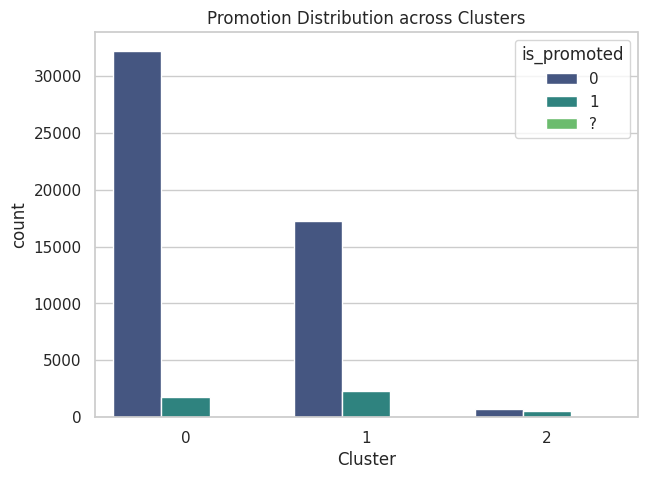

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x="Cluster", hue="is_promoted", data=df, palette="viridis")
plt.title("Promotion Distribution across Clusters")
plt.show()


 Cleaned Class Distribution:
is_promoted
0    50139
1     4668
Name: count, dtype: int64

 Train-test split successful


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



================ Logistic Regression ================
✅ Accuracy: 0.9355044699872286
✅ Precision: 0.9348659003831418
✅ Recall: 0.26124197002141325
✅ F1 Score: 0.40836820083682007
✅ ROC-AUC: 0.7945032282200843

Confusion Matrix:
 [[10011    17]
 [  690   244]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     10028
           1       0.93      0.26      0.41       934

    accuracy                           0.94     10962
   macro avg       0.94      0.63      0.69     10962
weighted avg       0.94      0.94      0.92     10962



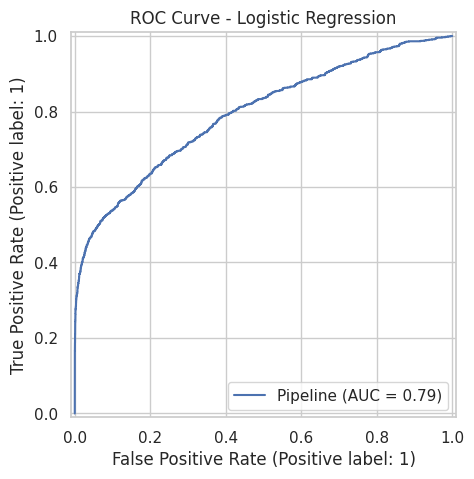

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



================ Random Forest ================
✅ Accuracy: 0.9323116219667944
✅ Precision: 0.9102564102564102
✅ Recall: 0.22805139186295503
✅ F1 Score: 0.3647260273972603
✅ ROC-AUC: 0.7896040978194675

Confusion Matrix:
 [[10007    21]
 [  721   213]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     10028
           1       0.91      0.23      0.36       934

    accuracy                           0.93     10962
   macro avg       0.92      0.61      0.66     10962
weighted avg       0.93      0.93      0.91     10962



/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


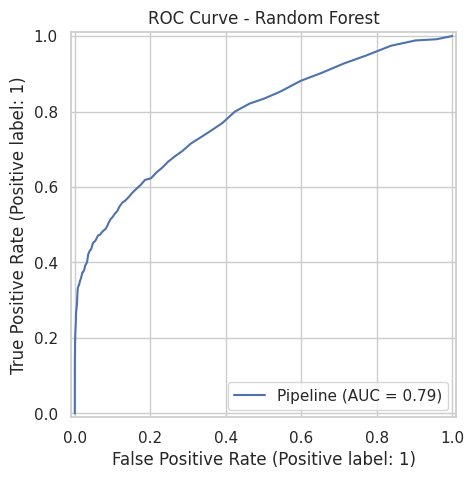

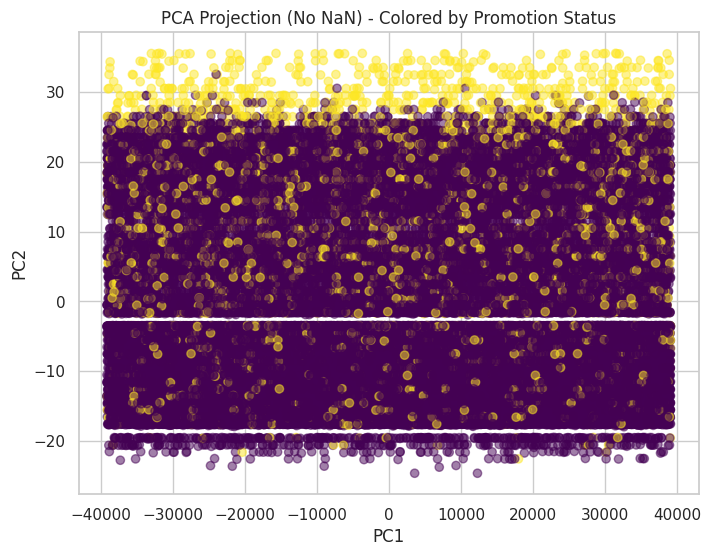


 PCA Successful — No Missing Values
Explained Variance Ratio: [9.99999610e-01 3.43192803e-07]


In [ ]:

# DATA CLEANING + MODEL BUILDING + PCA


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

#  Load CSV file
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/employee_promotion.csv"
df = pd.read_csv(url)

#  Clean target variable (remove '?' if it exists anywhere)
df['is_promoted'] = pd.to_numeric(df['is_promoted'], errors='coerce')
df = df.dropna(subset=['is_promoted'])
df['is_promoted'] = df['is_promoted'].astype(int)

#  Features & Target
X = df.drop(columns=['is_promoted', 'Cluster', 'PCA1', 'PCA2'], errors='ignore')
y = df['is_promoted']

#  Separate numeric & categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipelines (Imputation + Encoding + Scaling)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# Check and perform safe stratified split
print("\n Cleaned Class Distribution:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\n Train-test split successful")

# Models
models = {
    "Logistic Regression": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    "Random Forest": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
    ])
}

#  Train & Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n================ {name} ================")
    print("✅ Accuracy:", accuracy_score(y_test, y_pred))
    print("✅ Precision:", precision_score(y_test, y_pred))
    print("✅ Recall:", recall_score(y_test, y_pred))
    print("✅ F1 Score:", f1_score(y_test, y_pred))
    print("✅ ROC-AUC:", roc_auc_score(y_test, y_proba))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"ROC Curve - {name}")
    plt.show()


#  PCA VISUALIZATION BY PROMOTION STATUS

from sklearn.decomposition import PCA

# Step 1: Preprocess (Impute + Encode + Scale)
pca_preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ],
    remainder='drop'
)

# Step 2: Fit & Transform
X_processed = pca_preprocessor.fit_transform(X)

# Step 3: Apply PCA
pca_model = PCA(n_components=2, random_state=42)
pca_result = pca_model.fit_transform(X_processed)

# Step 4: Plot PCA colored by target (is_promoted)
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=y, cmap='viridis', alpha=0.5)
plt.title("PCA Projection (No NaN) - Colored by Promotion Status")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("\n PCA Successful — No Missing Values")
print("Explained Variance Ratio:", pca_model.explained_variance_ratio_)


